In [139]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

# TODO START

In [118]:
X,y = load_breast_cancer(as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

load_breast_cancer()['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**scatterplot два варианта**

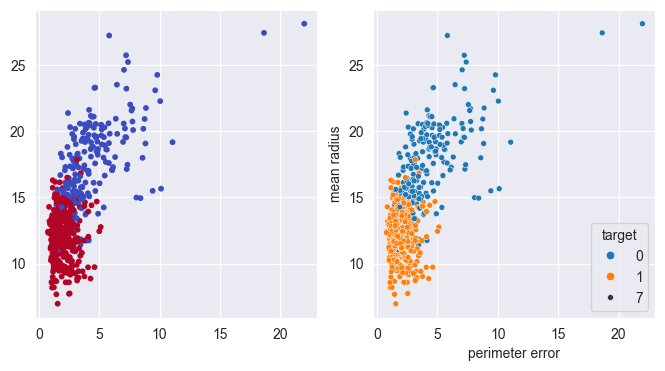

In [111]:
fig, (axis1, axis2)= plt.subplots(1, 2, figsize=(8, 4))
axis1.scatter(X['perimeter error'], X['mean radius'], c=y, cmap="coolwarm", s=10)
# plt.show()

sns.scatterplot(x=X['perimeter error'], y=X['mean radius'], hue=y, size=7, ax=axis2)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC linear**

In [56]:
svm_line = SVC(C=1.0, kernel='linear', probability=True, random_state=42)

svm_line.fit(X_train, y_train)

y_pred_ln = svm_line.predict(X_test)
y_score_ln = svm_line.predict_proba(X_test)

y_score_ln[:5]

array([[1.82398534e-01, 8.17601466e-01],
       [9.99905713e-01, 9.42868894e-05],
       [9.93728607e-01, 6.27139283e-03],
       [5.60490334e-06, 9.99994395e-01],
       [2.02091565e-07, 9.99999798e-01]])

**SVC rbf**

In [57]:
svm_line = SVC(C=1.0, probability=True, random_state=42)

svm_line.fit(X_train, y_train)

y_pred_rbf = svm_line.predict(X_test)
y_score_rbf = svm_line.predict_proba(X_test)

y_score_rbf[:5]

array([[1.67989060e-02, 9.83201094e-01],
       [9.99751831e-01, 2.48169320e-04],
       [9.98463421e-01, 1.53657882e-03],
       [4.19673738e-08, 9.99999958e-01],
       [6.31166096e-09, 9.99999994e-01]])

**LogReg**

In [64]:
logreg = LogisticRegression(penalty=None, random_state=42)

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_score_log = logreg.predict_proba(X_test)


y_score_log[:5]
# y_pred_log[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

**LogReg Polinomial**

In [66]:
logreg_poly = LogisticRegression()

# logreg.fit(X_train, y_train)
# 
# y_pred_log = logreg.predict(X_test)
# y_score_log = logreg.predict_proba(X_test)

**pipe_line**
   * make_pipeline
      * Автоматически создаёт имена шагов (например, standardscaler, ridge)
   * Pipeline
      * В ручную задаём имена шагов (например, 'reg')

In [141]:
# TODO pipe_line

# pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2), LogisticRegression(penalty=None))

pipe = Pipeline(steps = [('StandardScaler', StandardScaler()),('PolynomialFeatures', PolynomialFeatures(degree=2)), ('LogisticRegression', LogisticRegression(penalty=None))])
log_poly = pipe.fit(X_train, y_train)

# y_pred_poly = logreg.predict(X_test)
# y_score_poly = logreg.predict_proba(X_test)

y_pred_poly = pipe.predict(X_test)
y_score_poly = pipe.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Classification report:\n", classification_report(y_test, y_pred_poly))
print("roc_auc_score :\n",roc_auc_score(y_test, y_score_poly[:, 1]))
print("f1_score :\n",f1_score(y_test, y_pred_poly))


Accuracy: 0.9385964912280702
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

roc_auc_score :
 0.9908286930887651
f1_score :
 0.9503546099290779
